# Reporting and Analytics Demo

This notebook demonstrates the reporting and analytics capabilities of the AI-Based Transaction Failure Prediction System.

In [ ]:
import sys, os
project_root = os.path.dirname(os.getcwd())
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd()))
sys.path.insert(0, project_root)

# Import our analytics module
from src.analytics.reporting_module import AnalyticsReporter
from src.simulator.transaction_simulator import TransactionSimulator
from src.model.model_evaluation import ModelEvaluator

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Initialize Analytics Reporter

Create an instance of the analytics reporter to generate reports and visualizations.

In [15]:
# Initialize the reporter
reporter = AnalyticsReporter()
print(f"Analytics reporter initialized")
print(f"Reports directory: {reporter.reports_dir}")

Analytics reporter initialized
Reports directory: reports


## Generate Sample Transaction Data

Generate transaction data to analyze.

In [16]:
# Generate sample transaction data
print("Generating sample transaction data...")
simulator = TransactionSimulator(failure_rate=0.15)
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

transactions_df = simulator.generate_transactions(
    count=5000,
    start_date=start_date,
    end_date=end_date
)

print(f"Generated {len(transactions_df)} transactions")
print(f"Failure rate: {transactions_df['transaction_failure'].mean():.2%}")
transactions_df.head()

INFO:src.simulator.transaction_simulator:Generating 5000 synthetic transactions...
INFO:src.simulator.transaction_simulator:Generated 1000/5000 transactions...
INFO:src.simulator.transaction_simulator:Generated 2000/5000 transactions...
INFO:src.simulator.transaction_simulator:Generated 3000/5000 transactions...


Generating sample transaction data...


INFO:src.simulator.transaction_simulator:Generated 4000/5000 transactions...
INFO:src.simulator.transaction_simulator:Successfully generated 5000 transactions with 881 failures (17.62% failure rate)


Generated 5000 transactions
Failure rate: 17.62%


,transaction_id,timestamp,transaction_amount,time_of_day,day_of_week,transaction_type,location,account_balance,historical_failure_rate,merchant_category,location_risk_score,transaction_failure,failure_type,failure_reason
0,368939b5-eae4-4965-a82d-33e8cf5f8471,2023-12-08 23:13:19,3.056293,23,4,debit,international,45.887213,0.139420,retail,0.634499,1,network_error,network_error
1,3fc37c11-6105-4bb5-934b-031244a1f39b,2023-03-12 04:19:33,6.098480,4,6,credit,national,48.469426,0.332482,gas,0.309680,0,success,none
2,489e8747-ba9a-496d-92f9-f7b34d6cc98a,2023-03-23 03:58:25,10.893340,3,3,credit,national,71.592349,0.129041,retail,0.822727,0,success,none
3,fb27d5d1-14ef-4091-87c0-082aa80d20d4,2023-08-19 09:59:59,1.167096,9,5,debit,high_risk_location_1,87.631534,0.434988,online,0.688584,0,success,none
4,fdcb6097-2cf9-4be6-8b0e-2b66f6737f40,2023-03-01 02:55:13,36.176466,2,2,credit,local,41.061428,0.348687,online,0.930296,0,success,none


## Generate Transaction Analysis Report

Create a comprehensive analysis of the transaction data.

In [6]:
# Generate transaction analysis report
analysis_report = reporter.generate_transaction_analysis_report(transactions_df)

# Print the summary
print(analysis_report['summary'])

# Save the report
report_path = reporter.save_report(analysis_report, "transaction_analysis_demo.json")
print(f"\nFull report saved to: {report_path}")

INFO:src.analytics.reporting_module:Transaction analysis report generated
INFO:src.analytics.reporting_module:Report saved to reports\transaction_analysis_demo.json



            Transaction Analysis Report
            Total Transactions: 5000
            Failed Transactions: 947
            Success Rate: 81.06%
            Average Transaction Amount: $61.03
            Median Transaction Amount: $20.85
            

Full report saved to: reports\transaction_analysis_demo.json


## Generate Mock Prediction Data

Create mock prediction data to demonstrate model performance reporting.

In [17]:
# Generate mock prediction data
# In a real scenario, these would come from your trained model
np.random.seed(42)  # For reproducible results
y_true = transactions_df['transaction_failure'].tolist()

# Simulate predictions with some accuracy
y_pred = []
y_pred_proba = []

for true_val in y_true:
    # 85% accuracy in predictions
    if np.random.random() < 0.85:
        y_pred.append(true_val)  # Correct prediction
        # Set probability based on correctness
        if true_val == 1:
            y_pred_proba.append(np.random.beta(2, 0.5))  # High prob for failures
        else:
            y_pred_proba.append(np.random.beta(0.5, 2))  # Low prob for successes
    else:
        y_pred.append(1 - true_val)  # Incorrect prediction
        # Set probability opposite to true value for incorrect predictions
        if true_val == 1:
            y_pred_proba.append(np.random.beta(0.5, 2))  # Low prob for actual failures
        else:
            y_pred_proba.append(np.random.beta(2, 0.5))  # High prob for actual successes

print(f"Generated {len(y_true)} mock predictions")
print(f"True failure rate: {sum(y_true)/len(y_true):.3f}")
print(f"Predicted failure rate: {sum(y_pred)/len(y_pred):.3f}")
print(f"Prediction accuracy: {(np.array(y_true) == np.array(y_pred)).mean():.3f}")

Generated 5000 mock predictions
True failure rate: 0.176
Predicted failure rate: 0.272
Prediction accuracy: 0.844


## Generate Performance Report

Create a report on model performance metrics.

In [8]:
# Generate performance report
performance_report = reporter.generate_performance_report(
    y_true, y_pred, y_pred_proba, model_name="Demo Model"
)

# Print the summary
print(performance_report['summary'])

# Save the report
perf_report_path = reporter.save_report(performance_report, "performance_demo.json")
print(f"\nFull report saved to: {perf_report_path}")

INFO:src.analytics.reporting_module:Performance report generated for Demo Model
INFO:src.analytics.reporting_module:Report saved to reports\performance_demo.json



            Performance Report for Demo Model
            Accuracy:  0.8502
            Precision: 0.5705
            Recall:    0.8458
            F1 Score:  0.6814
            ROC AUC:   0.8192
            

Full report saved to: reports\performance_demo.json


## Create Prediction Visualizations

Generate visualizations to analyze model predictions.

INFO:src.analytics.reporting_module:Visualizations saved to reports/demo_prediction_visualizations.png


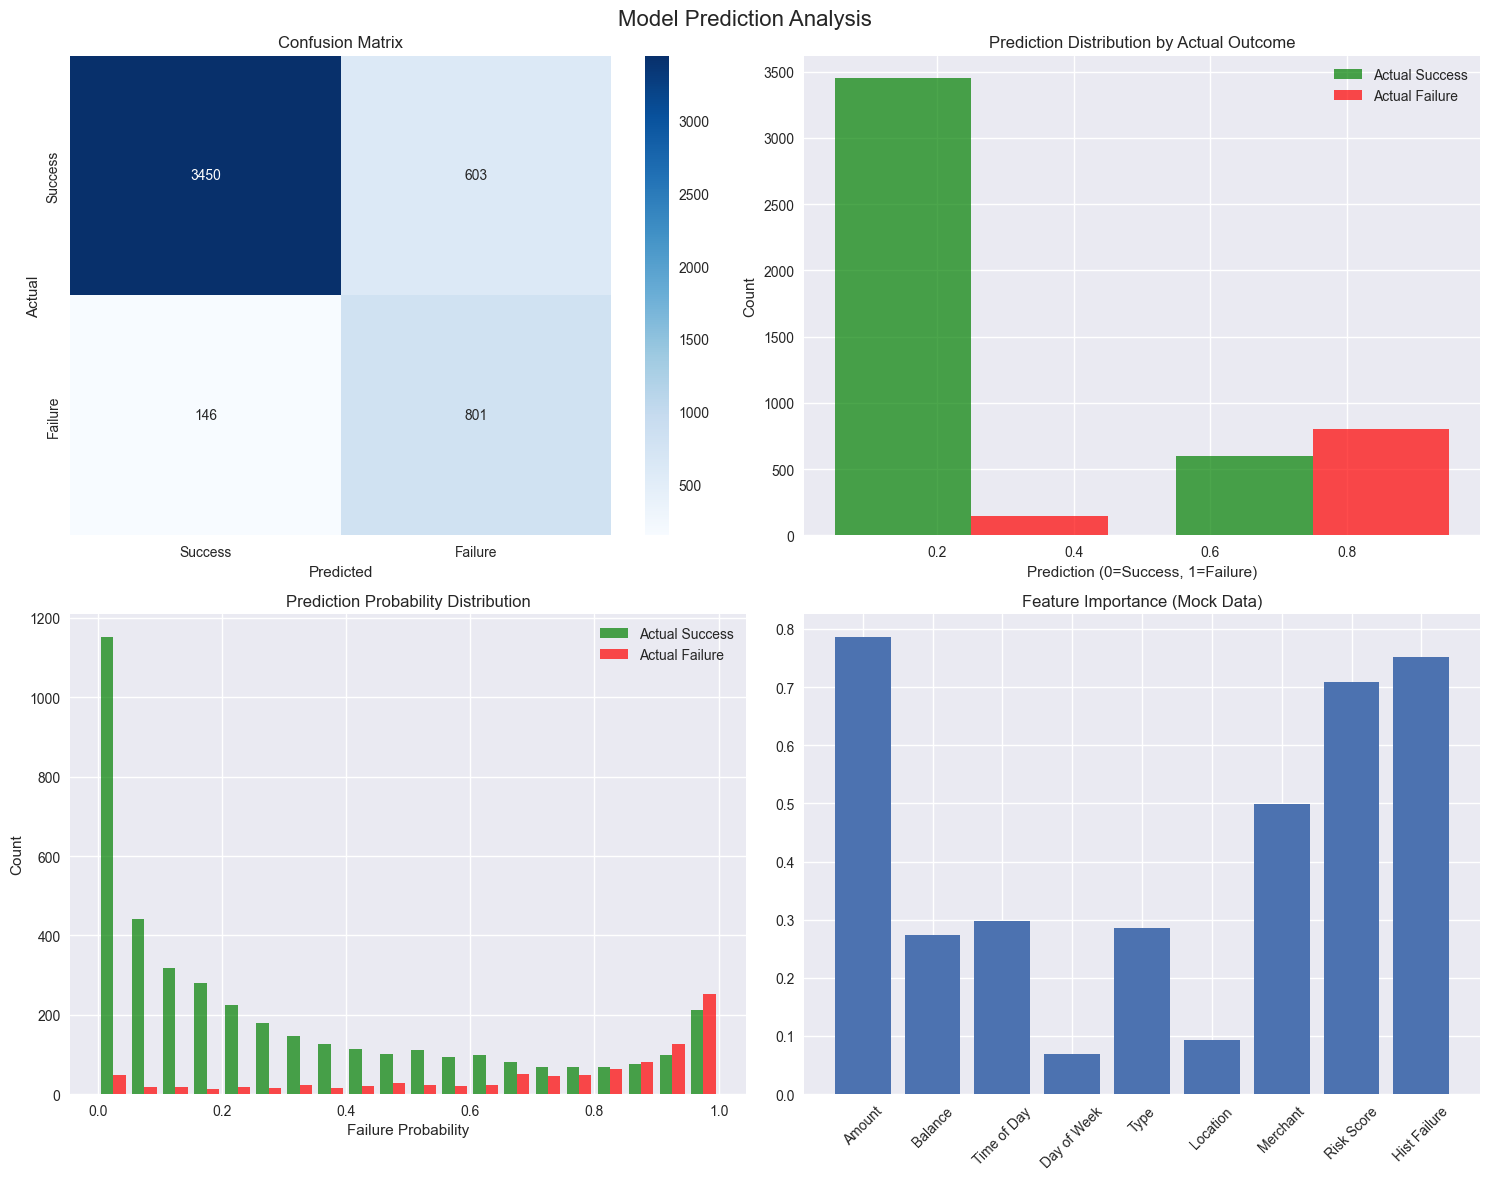

Prediction visualizations created and saved


In [9]:
# Create prediction visualizations
reporter.create_prediction_visualizations(
    y_true, y_pred, y_pred_proba, 
    save_path="reports/demo_prediction_visualizations.png"
)
print("Prediction visualizations created and saved")

## Create Transaction Analysis Visualizations

Generate visualizations to analyze transaction patterns.

INFO:src.analytics.reporting_module:Transaction analysis visualizations saved to reports/demo_transaction_analysis_visualizations.png


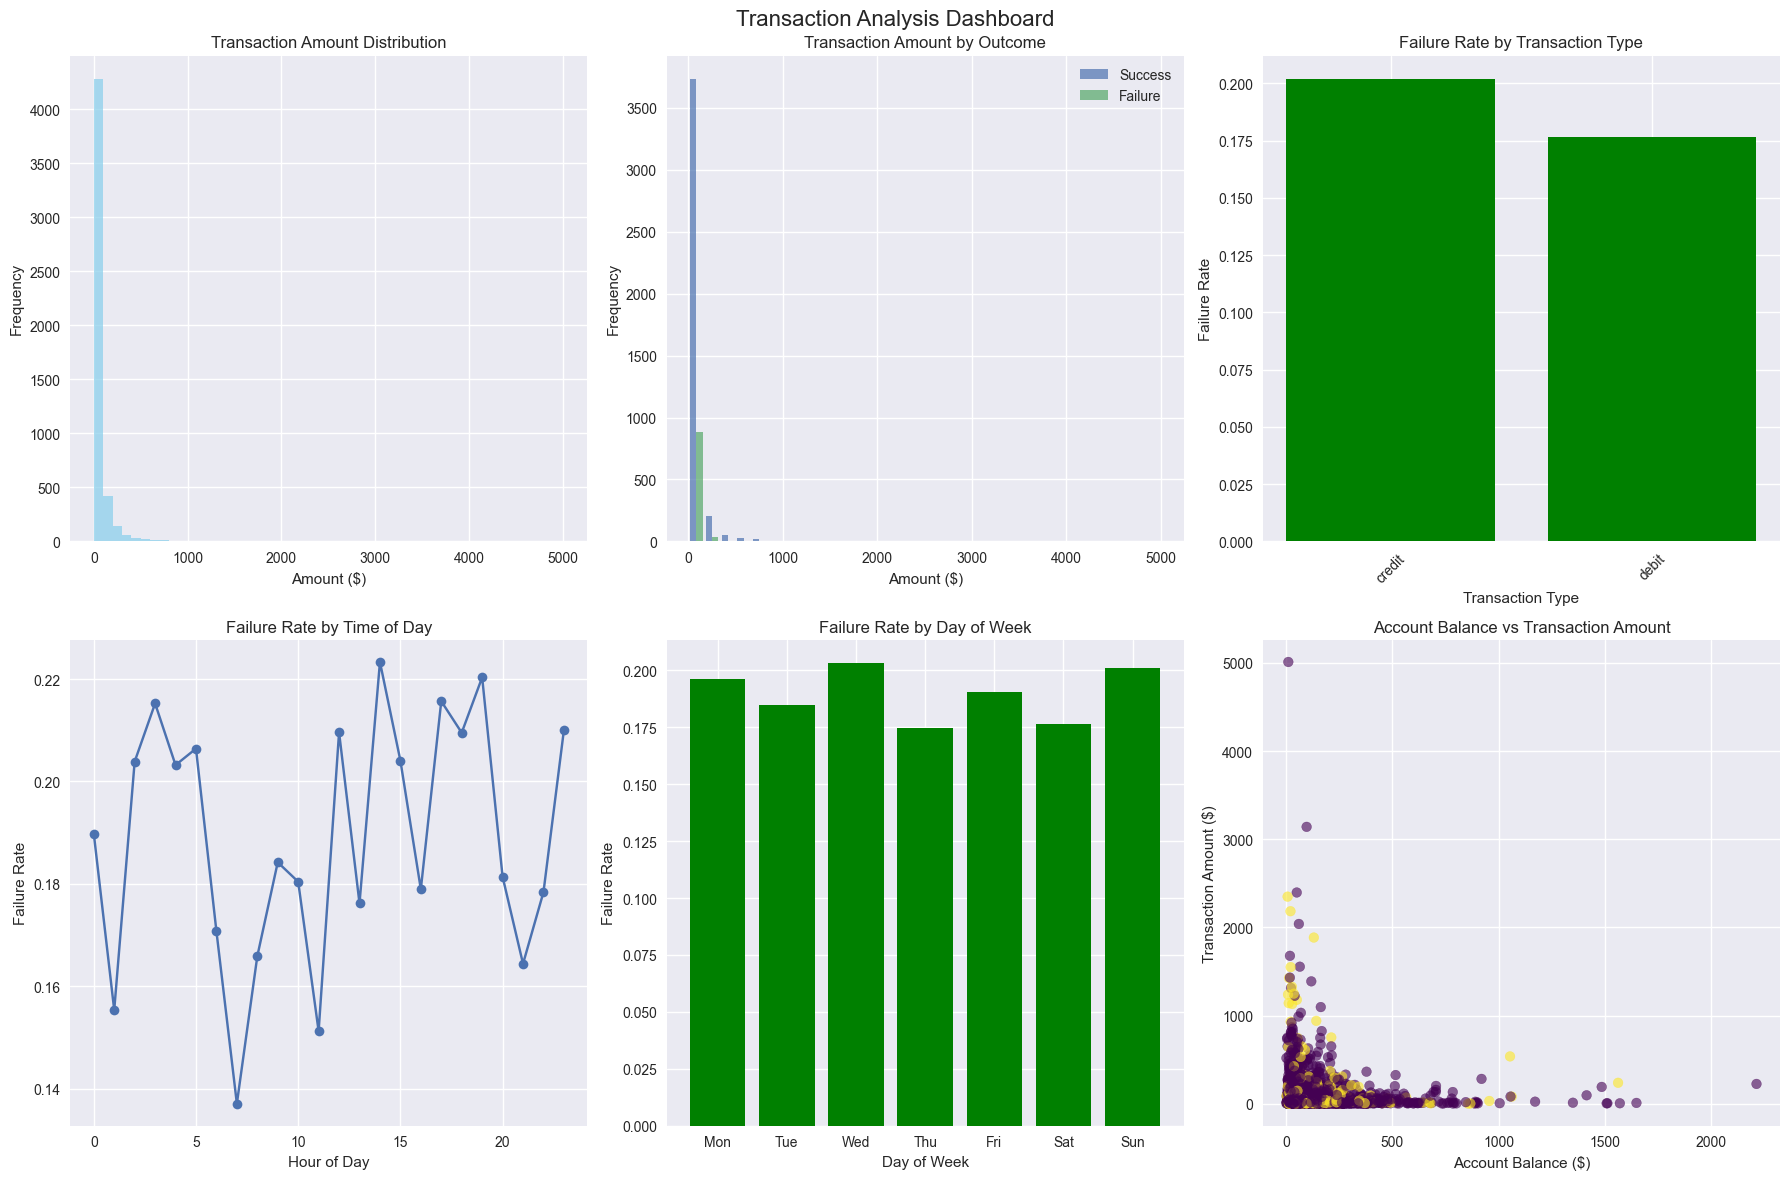

Transaction analysis visualizations created and saved


In [10]:
# Create transaction analysis visualizations
reporter.create_transaction_analysis_visualizations(
    transactions_df, 
    save_path="reports/demo_transaction_analysis_visualizations.png"
)
print("Transaction analysis visualizations created and saved")

## Create Interactive Dashboard

Generate an interactive dashboard for transaction analysis.

In [11]:
# Create interactive dashboard
reporter.create_interactive_dashboard(
    transactions_df, 
    save_path="reports/demo_interactive_dashboard.html"
)
print("Interactive dashboard created and saved")

INFO:src.analytics.reporting_module:Interactive dashboard saved to reports/demo_interactive_dashboard.html


Interactive dashboard created and saved


## Generate Monthly Reports

Create monthly reports to analyze transaction patterns over time.

In [12]:
# Generate monthly reports
monthly_reports = []

for month in range(1, 13):
    monthly_report = reporter.generate_monthly_report(transactions_df, month, 2023)
    monthly_reports.append(monthly_report)
    
    # Save individual monthly report
    monthly_report_path = reporter.save_report(
        monthly_report, 
        f"monthly_demo_{2023}_{month:02d}.json"
    )
    print(f"Monthly report for 2023-{month:02d} saved to {monthly_report_path}")

# Create a summary DataFrame
monthly_summary = pd.DataFrame([
    {
        'Month': f"2023-{r['month']:02d}",
        'Total Transactions': r['total_transactions'],
        'Failed Transactions': r['failed_transactions'],
        'Success Rate': r['success_rate'],
        'Total Amount': r['total_amount']
    } for r in monthly_reports
])

print("\nMonthly Summary:")
print(monthly_summary)

INFO:src.analytics.reporting_module:Monthly report generated for 2023-01
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_01.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-02
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_02.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-03
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_03.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-04
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_04.json


Monthly report for 2023-01 saved to reports\monthly_demo_2023_01.json
Monthly report for 2023-02 saved to reports\monthly_demo_2023_02.json
Monthly report for 2023-03 saved to reports\monthly_demo_2023_03.json
Monthly report for 2023-04 saved to reports\monthly_demo_2023_04.json


INFO:src.analytics.reporting_module:Monthly report generated for 2023-05
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_05.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-06
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_06.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-07
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_07.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-08
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_08.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-09
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_09.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-10


Monthly report for 2023-05 saved to reports\monthly_demo_2023_05.json
Monthly report for 2023-06 saved to reports\monthly_demo_2023_06.json
Monthly report for 2023-07 saved to reports\monthly_demo_2023_07.json
Monthly report for 2023-08 saved to reports\monthly_demo_2023_08.json
Monthly report for 2023-09 saved to reports\monthly_demo_2023_09.json


INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_10.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-11
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_11.json
INFO:src.analytics.reporting_module:Monthly report generated for 2023-12
INFO:src.analytics.reporting_module:Report saved to reports\monthly_demo_2023_12.json


Monthly report for 2023-10 saved to reports\monthly_demo_2023_10.json
Monthly report for 2023-11 saved to reports\monthly_demo_2023_11.json
Monthly report for 2023-12 saved to reports\monthly_demo_2023_12.json

Monthly Summary:
      Month  Total Transactions  Failed Transactions  Success Rate  \
0   2023-01                 458                   92      0.799127   
1   2023-02                 386                   70      0.818653   
2   2023-03                 408                   74      0.818627   
3   2023-04                 371                   83      0.776280   
4   2023-05                 430                   70      0.837209   
5   2023-06                 421                   77      0.817102   
6   2023-07                 422                   75      0.822275   
7   2023-08                 423                   73      0.827423   
8   2023-09                 435                   94      0.783908   
9   2023-10                 419                   87      0.792363   
10

## Visualize Monthly Trends

Create visualizations for monthly trends.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

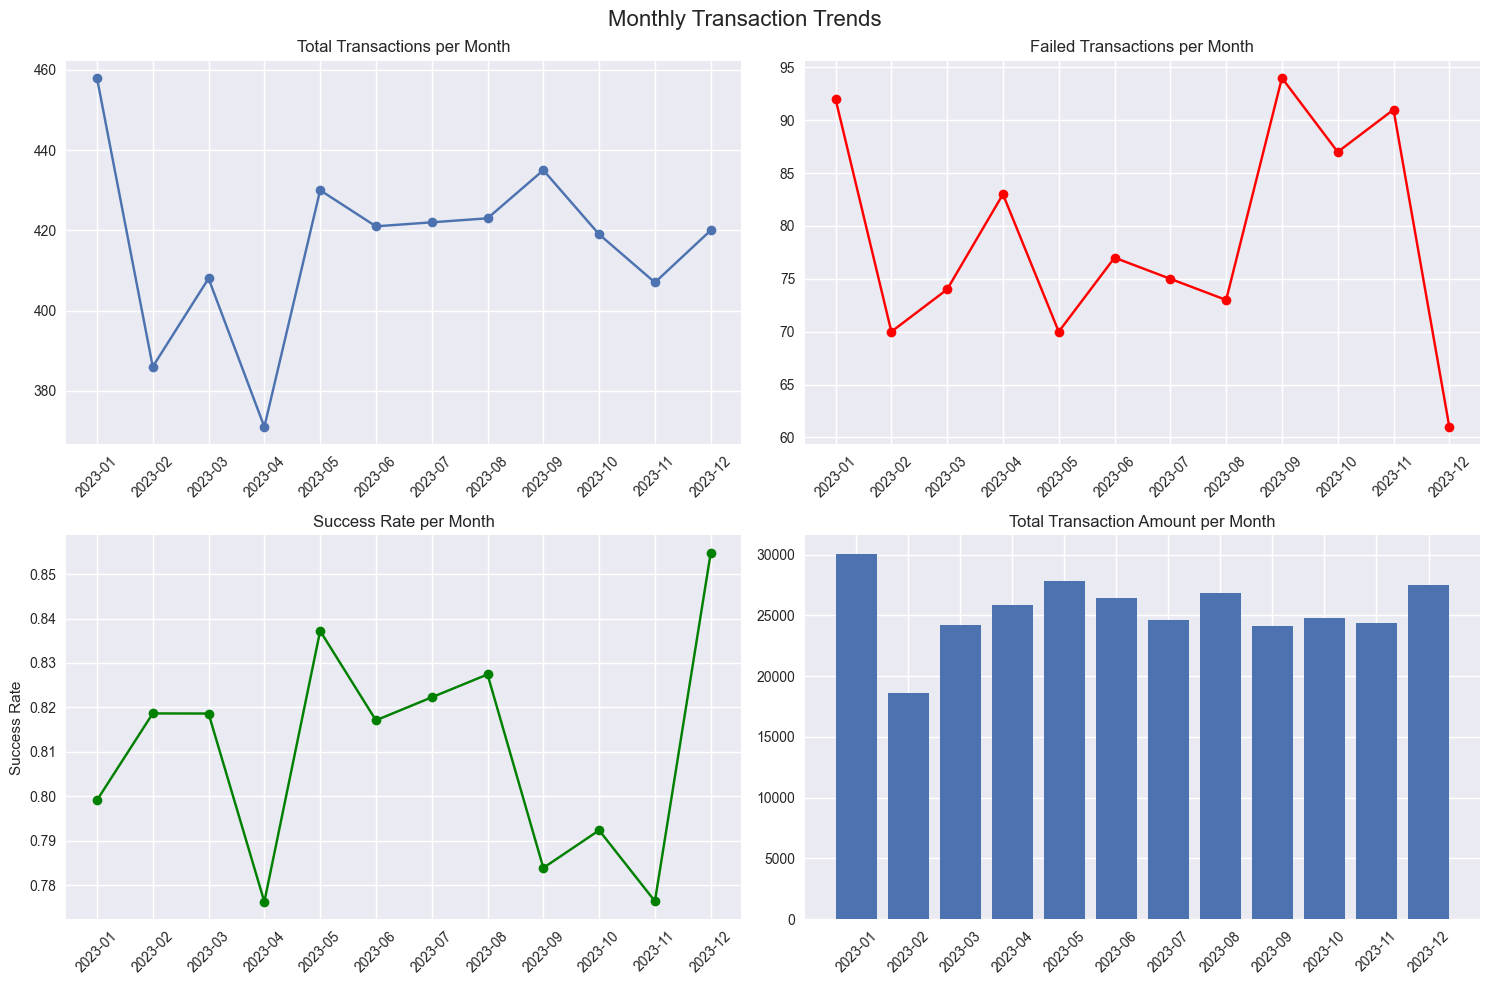

In [13]:
# Create monthly trends visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Monthly Transaction Trends', fontsize=16)

# Total transactions per month
axes[0, 0].plot(monthly_summary['Month'], monthly_summary['Total Transactions'], marker='o')
axes[0, 0].set_title('Total Transactions per Month')
axes[0, 0].tick_params(axis='x', rotation=45)

# Failed transactions per month
axes[0, 1].plot(monthly_summary['Month'], monthly_summary['Failed Transactions'], marker='o', color='red')
axes[0, 1].set_title('Failed Transactions per Month')
axes[0, 1].tick_params(axis='x', rotation=45)

# Success rate per month
axes[1, 0].plot(monthly_summary['Month'], monthly_summary['Success Rate'], marker='o', color='green')
axes[1, 0].set_title('Success Rate per Month')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylabel('Success Rate')

# Total amount per month
axes[1, 1].bar(monthly_summary['Month'], monthly_summary['Total Amount'])
axes[1, 1].set_title('Total Transaction Amount per Month')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Generate Recommendations

Based on the analysis, generate recommendations to improve transaction success rates.

In [14]:
# Generate recommendations based on analysis
print("AI-Based Recommendations:")
print("========================")

# Find high-risk factors
failure_by_amount = transactions_df[transactions_df['transaction_failure'] == 1]['transaction_amount']
high_risk_amount_threshold = failure_by_amount.quantile(0.75)  # 75th percentile

print(f"1. High-risk transactions: Amounts above ${high_risk_amount_threshold:.2f} have higher failure rates")

# Find time-based patterns
failure_by_time = transactions_df.groupby('time_of_day')['transaction_failure'].mean()
peak_failure_hours = failure_by_time.nlargest(3).index.tolist()
print(f"2. Peak failure hours: {peak_failure_hours} - Consider additional verification during these times")

# Find location-based patterns
failure_by_location = transactions_df.groupby('location')['transaction_failure'].mean()
high_risk_locations = failure_by_location.nlargest(3)
print(f"3. High-risk locations: {list(high_risk_locations.index)} with failure rates: {[f'{rate:.2%}' for rate in high_risk_locations.values]}")

# Find merchant category patterns
failure_by_merchant = transactions_df.groupby('merchant_category')['transaction_failure'].mean()
high_risk_merchants = failure_by_merchant.nlargest(3)
print(f"4. High-risk merchant categories: {list(high_risk_merchants.index)} with failure rates: {[f'{rate:.2%}' for rate in high_risk_merchants.values]}")

# Model performance recommendation
accuracy = performance_report['metrics']['accuracy']
if accuracy < 0.8:
    print(f"5. Model performance: Current accuracy is {accuracy:.2%}, consider retraining with more data")
else:
    print(f"5. Model performance: Current accuracy is {accuracy:.2%}, performing well")

AI-Based Recommendations:
1. High-risk transactions: Amounts above $52.24 have higher failure rates
2. Peak failure hours: [14, 19, 17] - Consider additional verification during these times
3. High-risk locations: ['high_risk_location_1', 'high_risk_location_2', 'international'] with failure rates: ['24.37%', '23.76%', '16.16%']
4. High-risk merchant categories: ['retail', 'gas', 'restaurant'] with failure rates: ['19.81%', '19.25%', '19.07%']
5. Model performance: Current accuracy is 85.02%, performing well


## Summary

We have demonstrated the reporting and analytics capabilities of the system:
1. Generated transaction analysis reports
2. Created model performance reports
3. Generated visualizations for predictions and transactions
4. Created an interactive dashboard
5. Generated monthly reports
6. Identified trends and patterns
7. Generated AI-based recommendations

These capabilities allow for comprehensive analysis of transaction patterns and model performance, enabling data-driven decisions to improve transaction success rates.